In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
##zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)
##zipcodes.head( )

better_health = gpd.read_file('../data/Better_Health_Data_2024_release_20241202.geojson')
##print(better_health)
better_health.head(2)

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,...,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)


In [3]:
better_health.tail(2)

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,...,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)
240885,Binge drinking among adults,13.5,%,16.4,Binge Drinking,Wyoming,29818,56013,2022,19.5,...,None,Crude prevalence,None,Fremont,Health Risk Behaviors,CrdPrv,BINGE,BRFSS,39472,POINT (-108.63045 43.04064)


In [4]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [5]:
better_health_df1=better_health.drop(columns =['low_confidence_limit','data_value_unit','data_value','locationid','high_confidence_limit',
                                               'data_value_footnote','data_value_footnote_symbol', 'data_value_type', 'datavaluetypeid',
                                               'measureid', 'datasource'])
better_health_df1.head(2)          


,measure,short_question_text,statedesc,totalpop18plus,year,categoryid,stateabbr,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [6]:
better_health_df1['short_question_text']=better_health_df1['short_question_text'].astype(str)
better_health_df1.head(2)

,measure,short_question_text,statedesc,totalpop18plus,year,categoryid,stateabbr,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [7]:
type(better_health_df1)

geopandas.geodataframe.GeoDataFrame

In [8]:
better_health_df1.shape

(240886, 11)

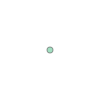

In [9]:
better_health_df1.loc[1,'geometry']

In [10]:
print(better_health_df1.loc[1, 'geometry'])

POINT (-85.3928136383141 31.8698172860413)


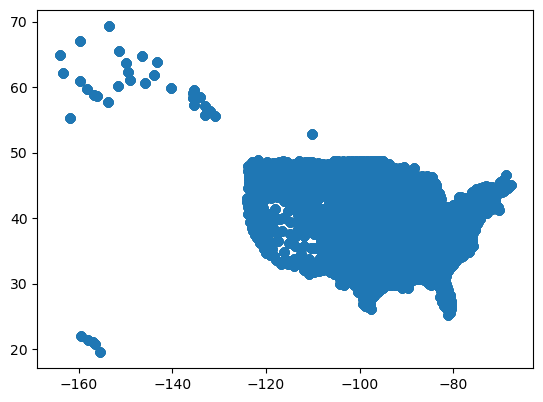

In [11]:
better_health_df1.plot();

In [12]:
better_health_df1.head()

,measure,short_question_text,statedesc,totalpop18plus,year,categoryid,stateabbr,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,Stroke,Alabama,91336,2022,HLTHOUT,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,Stroke,Alabama,27025,2022,HLTHOUT,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,Stroke,Alabama,11235,2022,HLTHOUT,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)


In [13]:
better_health_df1_state=better_health_df1.statedesc.value_counts().to_frame().reset_index()
better_health_df1_state

,statedesc,count
0,Texas,20320
1,Georgia,12720
2,Kentucky,9600
3,Missouri,9200
4,Virginia,8778
5,Kansas,8400
6,North Carolina,8000
7,Iowa,7920
8,Tennessee,7600
9,Nebraska,7440


In [143]:
better_health_df1.head()
#population_df=population_df.rename(columns={'NAME':'Name','POPESTIMATE2017':'Pop_2017'})
#population_df.head()
better_health_df1.rename(columns={'measure':'Measure','short_question_text': 'Category','statedesc':'State', 'totalpop18plus': '18plus', 'year':'Year',
                                  'categoryid':'C_ID','stateabbr': 'S_Abbr', 


,measure,short_question_text,statedesc,totalpop18plus,year,categoryid,stateabbr,locationname,category,totalpopulation,geometry
0,Diagnosed diabetes among adults,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,Stroke,Alabama,91336,2022,HLTHOUT,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,Stroke,Alabama,27025,2022,HLTHOUT,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,Stroke,Alabama,11235,2022,HLTHOUT,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)


In [151]:
better_health_df1=better_health_df1.rename(columns={'measure':'Measure','short_question_text': 'Category','statedesc':'State', 'totalpop18plus': '18plus', 'year':'Year',
                                  'categoryid':'Category_ID','stateabbr': 'St_Abbr', 'locationname': 'Location', 'category':'Group',
                                  'totalpopulation':'Population','geometry':'Geometry'})
better_health_df1


,Measure,Category,State,18plus,Year,Category_ID,St_Abbr,Location,Group,Population,Geometry
0,Diagnosed diabetes among adults,Diabetes,United States,260836730,2022,HLTHOUT,US,None,Health Outcomes,333287557,None
1,Hearing disability among adults,Hearing Disability,Alabama,19675,2022,DISABLT,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,Stroke,Alabama,91336,2022,HLTHOUT,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,Stroke,Alabama,27025,2022,HLTHOUT,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,Stroke,Alabama,11235,2022,HLTHOUT,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
...,...,...,...,...,...,...,...,...,...,...,...
240881,High blood pressure among adults,High Blood Pressure,Wisconsin,36755,2021,HLTHOUT,WI,Polk,Health Outcomes,45709,POINT (-92.44128 45.46151)
240882,Depression among adults,Depression,Wisconsin,23116,2022,HLTHOUT,WI,Trempealeau,Health Outcomes,30899,POINT (-91.35842 44.30395)
240883,Visited dentist or dental clinic in the past y...,Dental Visit,Wisconsin,25807,2022,PREVENT,WI,Door,Prevention,30526,POINT (-87.31142 44.95001)
240884,Self-care disability among adults,Self-care Disability,Wisconsin,107333,2022,DISABLT,WI,Marathon,Disability,137958,POINT (-89.75886 44.89830)


Q2: - Looking at Excel Spredsheet for NHE

In [148]:

nhe_df = pd.read_csv('../data/Table_1_NHE.csv')
nhe_df.head()

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Item,1960,1970,1980,1990,...,NaN,NaN,NaN,NaN,NaN
1,NaN,Amount in Billions,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,NaN,NaN,NaN,NaN,NaN
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,NaN,NaN,NaN,NaN,NaN
4,Personal Health Care,23.1,62.4,214.3,611.9,...,NaN,NaN,NaN,NaN,NaN


In [15]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [16]:
type(nhe_df)

pandas.core.frame.DataFrame

In [17]:
nhe_df.reset_index

<bound method DataFrame.reset_index of    Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022  \
0                                                Item                                                                                                            
1                                                 NaN                                                                                                            
2                       National Health Expenditures                                                                                                             
3                     Health Consumption Expenditures                                                                                                            
4                                Personal Health Care                                                                                                  

In [18]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [106]:
   
nhe_df1 = nhe_df.drop(columns=['Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
                              'Unnamed: 36','Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43',
                              'Unnamed: 44','Unnamed: 45', 'Unnamed: 46','Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
                              'Unnamed: 52','Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
                              'Unnamed: 60'])

nhe_df1.head()
    

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Item,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [107]:

nhe_df1=nhe_df1.rename(columns ={'Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022': 'NHE',
       'Unnamed: 1': '1960', 'Unnamed: 2': '1970', 'Unnamed: 3': '1980','Unnamed: 4': '1990', 'Unnamed: 5':'2000',
       'Unnamed: 6':'2001', 'Unnamed: 7':'2002', 'Unnamed: 8':'2003', 'Unnamed: 9':'2004', 'Unnamed: 10':'2005',
       'Unnamed: 11':'2006', 'Unnamed: 12':'2007', 'Unnamed: 13':'2008', 'Unnamed: 14':'2009',
       'Unnamed: 15':'2010', 'Unnamed: 16':'2011', 'Unnamed: 17': '2012', 'Unnamed: 18':'2013',
       'Unnamed: 19':'2014', 'Unnamed: 20':'2015', 'Unnamed: 21':'2016', 'Unnamed: 22':'2017',
       'Unnamed: 23':'2018', 'Unnamed: 24':'2019', 'Unnamed: 25':'2020', 'Unnamed: 26':'2021',
       'Unnamed: 27':'2022'})
nhe_df1.head()


,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [108]:
nhe_df1 = nhe_df1.dropna()
nhe_df1.head()

,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6


In [22]:
#df = df.drop([0, 2])
#df.drop(1, inplace=True)
#df.dropna()
#df.drop(1)  # for 1 row

In [109]:
nhe_df1=nhe_df1.drop(0)
nhe_df1.head()

,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,...,99.4,108.4,241.9,210.6,208.4


In [24]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2 to 36
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     object
 2

In [110]:
##candy_df['Name']=candy_df['Name'].astype(str)
##candy_df.head()
nhe_df1 = nhe_df1.astype(str)
nhe_df1.head()


,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,...,99.4,108.4,241.9,210.6,208.4


In [26]:
nhe_df1.shape

(21, 28)

In [27]:
type(nhe_df1)

pandas.core.frame.DataFrame

In [111]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,...,99.4,108.4,241.9,210.6,208.4


In [29]:
##pd.set_option('display.max.columns',30)
#df
pd.set_option('display.max.columns', 28)
pd.set_option('display.max.rows', 22)


In [112]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,...,99.4,108.4,241.9,210.6,208.4


In [113]:
##df.reset_index(drop=True, inplace=True)

nhe_df1 = nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
0,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,...,99.4,108.4,241.9,210.6,208.4


In [32]:
#Get rid off min. in duration column and change into integer
##movies_df['duration']=movies_df.duration.str[:-4].astype(int)

nhe_df1['1960']= nhe_df1['1960'].str.replace('$', '')
nhe_df1['1960']= nhe_df1['1960'].str.replace('%', '')
#nhe_df1['1960'] = nhe_df1['1960'].astype(str)


In [33]:
nhe_df1['1970']= nhe_df1['1970'].str.replace('$', '')
nhe_df1['1970']= nhe_df1['1970'].str.replace('%', '')
##nhe_df1['1970'] = nhe_df1['1970'].astype(int)

In [34]:
nhe_df1['1980']= nhe_df1['1980'].str.replace('$', '')
nhe_df1['1980']= nhe_df1['1980'].str.replace('%', '')

In [35]:
nhe_df1['1990']= nhe_df1['1990'].str.replace('$', '')
nhe_df1['1990']= nhe_df1['1990'].str.replace('%', '')

In [36]:
nhe_df1['2000']= nhe_df1['2000'].str.replace('$', '')
nhe_df1['2000']= nhe_df1['2000'].str.replace('%', '')

In [37]:
nhe_df1['2001']= nhe_df1['2001'].str.replace('$', '')
nhe_df1['2001']= nhe_df1['2001'].str.replace('%', '')

In [38]:
nhe_df1['2002']= nhe_df1['2002'].str.replace('$', '')
nhe_df1['2002']= nhe_df1['2002'].str.replace('%', '')

In [39]:
nhe_df1['2003']= nhe_df1['2003'].str.replace('$', '')
nhe_df1['2003']= nhe_df1['2003'].str.replace('%', '')

In [40]:
nhe_df1['2004']= nhe_df1['2004'].str.replace('$', '')
nhe_df1['2004']= nhe_df1['2004'].str.replace('%', '')

In [41]:
nhe_df1['2005']= nhe_df1['2005'].str.replace('$', '')
nhe_df1['2005']= nhe_df1['2005'].str.replace('%', '')

In [42]:
nhe_df1['2006']= nhe_df1['2006'].str.replace('$', '')
nhe_df1['2006']= nhe_df1['2006'].str.replace('%', '')

In [43]:
nhe_df1['2007']= nhe_df1['2007'].str.replace('$', '')
nhe_df1['2007']= nhe_df1['2007'].str.replace('%', '')

In [44]:
nhe_df1['2008']= nhe_df1['2008'].str.replace('$', '')
nhe_df1['2008']= nhe_df1['2008'].str.replace('%', '')

In [45]:
nhe_df1['2009']= nhe_df1['2009'].str.replace('$', '')
nhe_df1['2009']= nhe_df1['2009'].str.replace('%', '')

In [46]:
nhe_df1['2010']= nhe_df1['2010'].str.replace('$', '')
nhe_df1['2010']= nhe_df1['2010'].str.replace('%', '')

In [47]:
nhe_df1['2011']= nhe_df1['2011'].str.replace('$', '')
nhe_df1['2011']= nhe_df1['2011'].str.replace('%', '')

In [48]:
nhe_df1['2012']= nhe_df1['2012'].str.replace('$', '')
nhe_df1['2012']= nhe_df1['2012'].str.replace('%', '')

In [49]:
nhe_df1['2013']= nhe_df1['2013'].str.replace('$', '')
nhe_df1['2013']= nhe_df1['2013'].str.replace('%', '')

In [50]:
nhe_df1['2014']= nhe_df1['2014'].str.replace('$', '')
nhe_df1['2014']= nhe_df1['2014'].str.replace('%', '')

In [51]:
nhe_df1['2015']= nhe_df1['2015'].str.replace('$', '')
nhe_df1['2015']= nhe_df1['2015'].str.replace('%', '')

In [52]:
nhe_df1['2016']= nhe_df1['2016'].str.replace('$', '')
nhe_df1['2016']= nhe_df1['2016'].str.replace('%', '')

In [53]:
nhe_df1['2017']= nhe_df1['2017'].str.replace('$', '')
nhe_df1['2017']= nhe_df1['2017'].str.replace('%', '')

In [54]:
nhe_df1['2018']= nhe_df1['2018'].str.replace('$', '')
nhe_df1['2018']= nhe_df1['2018'].str.replace('%', '')

In [55]:
nhe_df1['2019']= nhe_df1['2019'].str.replace('$', '')
nhe_df1['2019']= nhe_df1['2019'].str.replace('%', '')

In [56]:
nhe_df1['2020']= nhe_df1['2020'].str.replace('$', '')
nhe_df1['2020']= nhe_df1['2020'].str.replace('%', '')

In [57]:
nhe_df1['2021']= nhe_df1['2021'].str.replace('$', '')
nhe_df1['2021']= nhe_df1['2021'].str.replace('%', '')

In [58]:
nhe_df1['2022']= nhe_df1['2022'].str.replace('$', '')
nhe_df1['2022']= nhe_df1['2022'].str.replace('%', '')

In [114]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
0,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,...,99.4,108.4,241.9,210.6,208.4


In [115]:
#df_reset = df.reset_index(drop=True)
nhe_df1=nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,...,2018,2019,2020,2021,2022
0,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,...,"$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,...,"3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,...,"3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,...,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,...,99.4,108.4,241.9,210.6,208.4


In [61]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     obje

In [62]:
##If you want to change the shape of your table, use Transpose :)
nhe_df1_r=nhe_df1.T
nhe_df1_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [63]:
nhe_df1_r.columns=nhe_df1_r.iloc[0]


In [64]:
nhe_df1_r

NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [65]:
nhe_df1_r=nhe_df1_r.iloc[1:].reset_index()
nhe_df1_r

NHE,index,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [66]:
nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [67]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [68]:
pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 27)

In [69]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
5,2001,"1,483.4","1,393.4","1,256.5",90.1,46.8,90.0,285,"10,581.9",100.0,93.9,84.7,6.1,3.2,6.1,"5,213","4,897","4,415",317,164,316,14.0
6,2002,"1,631.0","1,529.6","1,365.5",111.9,52.2,101.5,287,"10,929.1",100.0,93.8,83.7,6.9,3.2,6.2,"5,680","5,327","4,755",390,182,353,14.9
7,2003,"1,770.4","1,661.8","1,475.9",131.7,54.2,108.6,290,"11,456.5",100.0,93.9,83.4,7.4,3.1,6.1,"6,114","5,739","5,097",455,187,375,15.5
8,2004,"1,894.7","1,777.8","1,582.4",140.4,54.9,116.9,292,"12,217.2",100.0,93.8,83.5,7.4,2.9,6.2,"6,483","6,083","5,415",481,188,400,15.5
9,2005,"2,026.6","1,901.0","1,693.8",150.0,57.3,125.5,295,"13,039.2",100.0,93.8,83.6,7.4,2.8,6.2,"6,872","6,446","5,744",509,194,426,15.5


In [70]:
#transpose DataFrame without index
#df.set_index('team').T
##nhe_df1_r.set_index(0).T

NHE grew 4.1% to $4.5 trillion in 2022, or $13,493 per person, and accounted for 17.3% of Gross Domestic Product (GDP). (show the table)

In [71]:
pd.set_option('display.max.columns', 21)
pd.set_option('display.max.rows', 28)

Q3:Note for myself: “In 2022-2023, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (32 percent).” Is there a correlation with the first data (diabetes versus learning diabilities)?

Note for myself: 
“In 2020–21, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (33 percent).”
Is there a correlation with the first data (diabetes versus learning diabilities)?


In [72]:
kids_df = pd.read_csv('../data/kids_2022.csv')
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Updated:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Revised:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16231,-------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16232,- Data not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16233,x Data suppressed due to small cell size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
kids_df=kids_df.dropna()
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
5,2022,Alabama,Home,All Disabilities,52,60,6,1,1,21,...,-,-,-,-,-,-,-,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,-,-,...,409,151,268,1,9,165,26,0,10,208
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,-,-,...,6032,2004,4332,33,79,2497,502,5,235,2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,539,651,190,18,39,131,...,-,-,-,-,-,-,-,-,-,-


In [74]:
kids_df['Unnamed: 2'].value_counts()

Unnamed: 2
Correctional Facilities                                                                        854
Home                                                                                           854
Homebound/Hospital                                                                             854
Inside regular class 40% through 79% of the day                                                854
Separate School, School Age                                                                    854
Inside regular class 80% or more of the day                                                    854
Inside regular class less than 40% of the day                                                  854
Parentally Placed in Private Schools                                                           854
Residential Facility, Early Childhood                                                          854
Residential Facility, School Age                                                               854

In [75]:
pd.set_option('display.max.columns', 53)
#pd.set_option('display.max.rows', 22)

In [76]:
kids_df1=kids_df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8',
                               'Unnamed: 9','Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 6',  'Unnamed: 16',
                               'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25',
                               'Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32',
                               'Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 42',
                               'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
                               'Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',])
kids_df1

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 14,Unnamed: 15,Unnamed: 17,Unnamed: 18,Unnamed: 39,Unnamed: 40,Unnamed: 41
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [77]:
kids_df1=kids_df1.rename(columns = { 'Unnamed: 2':'Place','Extraction Date:':'Year','8/30/2023':'State','Unnamed: 3':'Category','Unnamed: 14':'Early Childhood F',
                                    'Unnamed: 15':'Early Childhood M','Unnamed: 17':'EL No - Early Childhood',
                                    'Unnamed: 18':'Age 3 to 5 (Early Childhood)','Unnamed: 39':'Age 18-21', 
                                    'Unnamed: 40': 'Age 5 (School Age)-21','Unnamed: 41':'Ages 6-21'}) 
kids_df1


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [141]:
#candy_df_top_state = candy_df.loc[candy_df['Name']=='Hawaii']
#candy_df_top_state
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

#pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 267)


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5054,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5055,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5056,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5057,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5058,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413
5059,2022,Iowa,Inside regular class less than 40% of the day,All Disabilities,-,-,-,-,487,4794,4669
5060,2022,Iowa,Parentally Placed in Private Schools,All Disabilities,-,-,-,-,25,910,834
5061,2022,Iowa,"Residential Facility, Early Childhood",All Disabilities,0,2,2,2,-,-,-
5062,2022,Iowa,"Residential Facility, School Age",All Disabilities,-,-,-,-,18,78,77
5063,2022,Iowa,Separate Class,All Disabilities,76,170,242,246,-,-,-


In [79]:
kids_df1.shape

(16227, 11)

In [80]:
kids_df1 = kids_df1.reset_index(drop=True)
kids_df1

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16222,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16223,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16224,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16225,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [81]:
kids_df1 = kids_df1.drop(0)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
5,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [82]:
kids_df1.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [83]:
#kids_df1['Category']= kids_df1['Category'].astype(int)
#kids_df1

In [84]:
kids_df1.shape

(16226, 11)

In [85]:
kids_df1.Category.value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64

In [86]:
#candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
#candy_df_by_state

In [87]:
type(kids_df1)

pandas.core.frame.DataFrame

In [88]:
#pd1.type=="Movie"
kids_df1.Category== 'Specific learning disability'

1        False
2        False
3        False
4        False
5        False
         ...  
16222    False
16223    False
16224    False
16225    False
16226    False
Name: Category, Length: 16226, dtype: bool

In [89]:
#pd1.loc[pd1['type']== 'Movie']
kids_df1_LD = kids_df1.loc[kids_df1['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [90]:
kids_df1_LD=kids_df1_LD.rename(columns ={'Age 5 (School Age)-21':'Age 5-21'})
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [91]:

pd.set_option('display.max.columns', 11)
#pd.set_option('display.max.rows', 1160)



In [92]:
#movies_released = movies_df.loc[movies_df.rating=='G'].groupby(['release_year']).title.count().sort_values(ascending=False).head()
#movies_released
kids_df2_LD = kids_df1_LD.Place.value_counts().to_frame().reset_index()
kids_df2_LD

,Place,count
0,Correctional Facilities,61
1,Home,61
2,Homebound/Hospital,61
3,Inside regular class 40% through 79% of the day,61
4,Inside regular class 80% or more of the day,61
5,Inside regular class less than 40% of the day,61
6,Parentally Placed in Private Schools,61
7,"Residential Facility, Early Childhood",61
8,"Residential Facility, School Age",61
9,Separate Class,61


In [93]:
kids_df1.State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Indian Education', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Northern Marianas',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Republic of Palau', 'Republic of the Marshall Islands',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'US, Outlying Areas, and Freely Associated State

In [94]:
kids_df1_Total = kids_df1.loc[kids_df1['Place']=='Total, School Age'].reset_index(drop=True)
kids_df1_Total.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",All Disabilities,-,-,-,-,4482,95252,91686
1,2022,Alabama,"Total, School Age",Autism,-,-,-,-,-,10185,-
2,2022,Alabama,"Total, School Age",Deaf-blindness,-,-,-,-,-,14,-
3,2022,Alabama,"Total, School Age",Developmental delay,-,-,-,-,-,3927,-
4,2022,Alabama,"Total, School Age",Emotional disturbance,-,-,-,-,-,1127,-


In [95]:
kids_df1_Total.shape

(854, 11)

In [117]:
kids_df1_Total_by_State = kids_df1_Total.loc[kids_df1_Total['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_Total_by_State


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",Specific learning disability,-,-,-,-,-,39755,-
1,2022,Alaska,"Total, School Age",Specific learning disability,-,-,-,-,-,6959,-
2,2022,American Samoa,"Total, School Age",Specific learning disability,-,-,-,-,-,355,-
3,2022,Arizona,"Total, School Age",Specific learning disability,-,-,-,-,-,55145,-
4,2022,Arkansas,"Total, School Age",Specific learning disability,-,-,-,-,-,20179,-
...,...,...,...,...,...,...,...,...,...,...,...
56,2022,Washington,"Total, School Age",Specific learning disability,-,-,-,-,-,44716,-
57,2022,West Virginia,"Total, School Age",Specific learning disability,-,-,-,-,-,15548,-
58,2022,Wisconsin,"Total, School Age",Specific learning disability,-,-,-,-,-,25168,-
59,2022,Wyoming,"Total, School Age",Specific learning disability,-,-,-,-,-,4473,-


Note to myself: Start making a graph with specific numbers to how Specific Learning Disability by State

In [123]:
kids_df1_Total_by_State.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [125]:
##candy_df = candy_df.drop(columns=['Unnamed: 0'])
##candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
##candy_df_by_state

kids_df1_Total_by_State=kids_df1_Total_by_State[['State', 'Age 5 (School Age)-21']]
kids_df1_Total_by_State


,State,Age 5 (School Age)-21
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
...,...,...
56,Washington,44716
57,West Virginia,15548
58,Wisconsin,25168
59,Wyoming,4473


In [149]:
#candy_df=candy_df.rename(columns={'name':'Name'})
kids_df1_Total_by_State=kids_df1_Total_by_State.rename(columns={'Age 5 (School Age)-21':'School Age:(5-21)'})
kids_df1_Total_by_State

,State,School Age: 5-21
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
5,Bureau of Indian Education,2747
6,California,279110
7,Colorado,43224
8,Connecticut,31080
9,Delaware,10787


In [133]:
#pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 61)

Iowa does not have data on Learning Disabilities or any other categories... 

In [142]:
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5054,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5055,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5056,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5057,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5058,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413
5059,2022,Iowa,Inside regular class less than 40% of the day,All Disabilities,-,-,-,-,487,4794,4669
5060,2022,Iowa,Parentally Placed in Private Schools,All Disabilities,-,-,-,-,25,910,834
5061,2022,Iowa,"Residential Facility, Early Childhood",All Disabilities,0,2,2,2,-,-,-
5062,2022,Iowa,"Residential Facility, School Age",All Disabilities,-,-,-,-,18,78,77
5063,2022,Iowa,Separate Class,All Disabilities,76,170,242,246,-,-,-


In [118]:
kids_df1_Total_by_State.shape

(61, 11)

In [119]:
kids_df1_Total_by_State.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Year                          61 non-null     object
 1   State                         61 non-null     object
 2   Place                         61 non-null     object
 3   Category                      61 non-null     object
 4   Early Childhood F             61 non-null     object
 5   Early Childhood M             61 non-null     object
 6   EL No - Early Childhood       61 non-null     object
 7   Age 3 to 5 (Early Childhood)  61 non-null     object
 8   Age 18-21                     61 non-null     object
 9   Age 5 (School Age)-21         61 non-null     object
 10  Ages 6-21                     61 non-null     object
dtypes: object(11)
memory usage: 5.4+ KB


In [97]:
kids_df1=kids_df1.reset_index(drop=True)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
1,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
2,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
3,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
4,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [98]:
type(kids_df1)

pandas.core.frame.DataFrame

In [99]:
type(nhe_df1_r)

pandas.core.frame.DataFrame

In [100]:
kids_df1['Category'].value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64